HW1

Convex and Conic Optimization (ORF523) <br>
[HW1 PDF](../hw_pdfs/ORF523_S21_HW1.pdf)

In [1]:
#!wget -O conway.jpeg https://www.princeton.edu/~aaa/Public/Teaching/ORF523/S21/conway.jpg 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# imread loads an image from the specified file
A = cv2.imread('conway.jpg')

# normalize function will scale the pixel values to range between 0 and 1
A = cv2.normalize(A, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# cvtColor will convert the image from RGB to grayscale
A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)


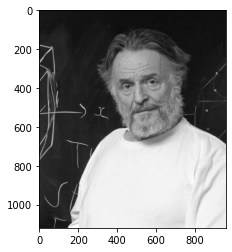

In [3]:
plt.imshow(A, cmap="gray") ## "gray" is just to tell matplotlib to use the right color map 

In [4]:
A.shape, 

((1120, 960),)

In [5]:
P, D, Q = np.linalg.svd(A, full_matrices=False)
assert list(D[:40]) == sorted(D[:40], reverse=True)
print(D[:40])

[553.44855    97.39698    60.94401    40.059067   34.79723    27.988237
  26.479502   21.846312   19.950142   18.9051     16.988192   14.610074
  14.099841   13.056848   13.04282    12.291195   11.613486   11.183943
  10.847563   10.425011    9.84979     9.55691     9.097794    8.980659
   8.747761    8.688121    8.466313    8.097354    7.853081    7.686154
   7.4215927   7.154047    7.099922    6.668875    6.529466    6.240485
   6.108609    5.922362    5.880488    5.7546043]


In [6]:
def low_rank_approximation(A, k):
    # Compute the SVD
    U, S, V = np.linalg.svd(A, full_matrices=False)
    # Zero out all but the first k singular values
    S[k:] = 0
    # Reconstruct the approximate matrix
    B = U @ np.diag(S) @ V
    return B

For k = 40, 80, 120, 160, use Matlab to compute A(k) as defined above. Report the
value of $||A − A(k)||_F$ in each case. (Include your code for this part and the next.)

In [7]:
#k = 40
k = 40
a_forty = low_rank_approximation(A, k)
f_val_a = np.linalg.norm(a_forty)
f_val_a


572.62683

In [8]:
k = 80
a_eighty = low_rank_approximation(A, k)
f_val_b = np.linalg.norm(a_eighty)
f_val_b


573.2038

In [9]:
k = 120
a_onetwen = low_rank_approximation(A, k)
f_val_c = np.linalg.norm(a_onetwen)
f_val_c


573.3747

In [10]:
k = 160
a_onesix = low_rank_approximation(A, k)
f_val_d = np.linalg.norm(a_onesix)
f_val_d

573.446

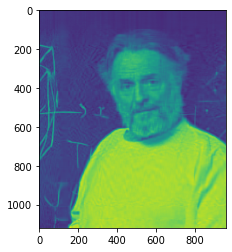

In [11]:
plt.imshow(a_forty)

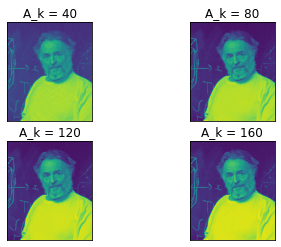

In [12]:

# create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

# display image1 in the top left subplot
axs[0, 0].imshow(a_forty)
axs[0, 0].set_title('A_k = 40')

# display image2 in the top right subplot
axs[0, 1].imshow(a_eighty)
axs[0, 1].set_title('A_k = 80')

# display image3 in the bottom left subplot
axs[1, 0].imshow(a_onetwen)
axs[1, 0].set_title('A_k = 120')

# display image4 in the bottom right subplot
axs[1, 1].imshow(a_onesix)
axs[1, 1].set_title('A_k = 160')

# remove the x and y ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# display the figure with the images
plt.show()


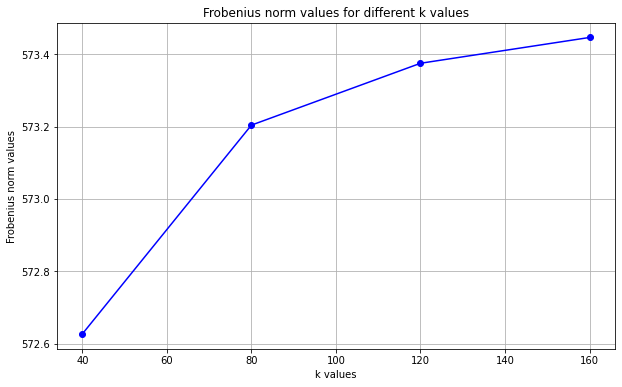

In [13]:
frobenius_vals = [f_val_a, f_val_b, f_val_c, f_val_d]
k_vals = [i for i in range(40, 161, 40)]

# Set the figure size
plt.figure(figsize=(10,6))

# Plot the data with a blue line ('-') and circular markers ('o')
plt.plot(k_vals, frobenius_vals, 'o-', color='b')

# Add labels to the axes
plt.xlabel('k values')
plt.ylabel('Frobenius norm values')

# Add a title to the plot
plt.title('Frobenius norm values for different k values')

# Add a grid for easier estimation of values
plt.grid(True)

# Display the plot
plt.show()

When we use Singular Value Decomposition (SVD) to form a rank-k approximation A(k), the matrices U, Σ, and V are as follows:

- $U$ is an $m * k$ matrix (as we only take k columns corresponding to the top k singular values)

- $\sum$ is a $k * k$ diagonal matrix (containing the top k singular values)
- $V$ is a $k * n$ matrix (as we only take k rows corresponding to the top k singular values)
Hence, the total number of elements required to store A(k) is $ k(m + 1 + n) $

### Total Savings

Saved for k = 160 in % is 83.33333333333334


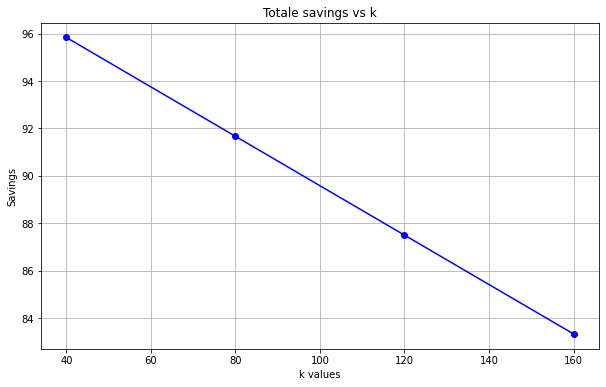

In [14]:
#How much are you saving for k = 160?
savings = [(((960-i)/960)*100) for i in k_vals]
print("Saved for k = 160 in % is {}".format(savings[3]))
# Set the figure size
plt.figure(figsize=(10,6))

# Plot the data with a blue line ('-') and circular markers ('o')
plt.plot(k_vals, savings, 'o-', color='b')

# Add labels to the axes
plt.xlabel('k values')
plt.ylabel('Savings')

# Add a title to the plot
plt.title('Totale savings vs k')

# Add a grid for easier estimation of values
plt.grid(True)

# Display the plot
plt.show()

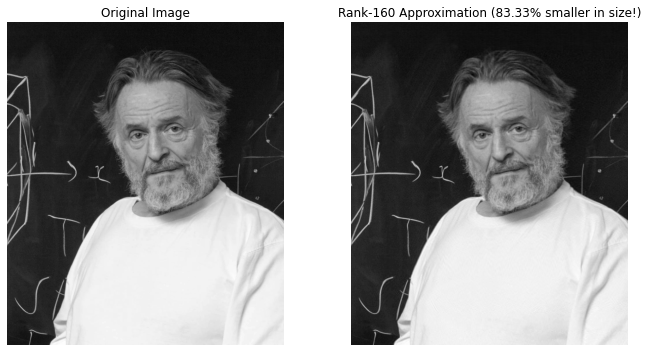

In [15]:
# Use the Matlab function imwrite to create two images from imshow(A) and imshow(A(160)). 
# Can you tell them apart?
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # adjust the size as needed

# Display the original image
axs[0].imshow(A, cmap="gray")
axs[0].set_title('Original Image')
axs[0].axis('off')  # To hide axis values

# Display the rank-160 approximation
axs[1].imshow(a_onesix, cmap="gray")
axs[1].set_title('Rank-160 Approximation (83.33% smaller in size!)')
axs[1].axis('off')  # To hide axis values

plt.tight_layout()
plt.show()


## TODO
- [ ] Problem 2 ![Problem 2](../media/hw1/prob2.png) 


- [ ] Problem 3 ![Problem 3](../media/hw1/prob3.png) 

- [ ] Problem 4 ![Problem 4](../media/hw1/prob4.png) 

## rough 

In [16]:
# Create a 3x3 matrix 'A'
A = np.random.rand(3, 3)
# Create a 3x1 matrix 'x'
x = np.random.rand(3, 1)
# Compute x^T(A^TAx)
first = np.dot(np.dot(x.T, np.dot(A.T, A)), x)

# Compute (x^TA^T)(Ax)
second = np.dot(np.dot(x.T, A.T), np.dot(A, x))

# Compute (Ax)^T(Ax)
temp = np.dot(A, x)
third = np.dot(temp.T, temp)

print("x^T(A^TAx) =", first)
print("(x^TA^T)(Ax) =", second)
print("(Ax)^T(Ax) =", third)


x^T(A^TAx) = [[0.68653164]]
(x^TA^T)(Ax) = [[0.68653164]]
(Ax)^T(Ax) = [[0.68653164]]


In [17]:
import numpy as np
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

arr1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a_T = arr1.transpose()

print(f'Original Array:\n{arr1}')
print(f'Transposed Array:\n{a_T}')

print("\n Output of  =  \n", np.dot(arr1,a_T))
print("\n Output of (squared)  =  \n", np.dot(a_T,a_T))


Original Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Transposed Array:
[[1 4 7]
 [2 5 8]
 [3 6 9]]

 Output of  =  
 [[ 14  32  50]
 [ 32  77 122]
 [ 50 122 194]]

 Output of (squared)  =  
 [[ 30  66 102]
 [ 36  81 126]
 [ 42  96 150]]
